0.8847951914514692

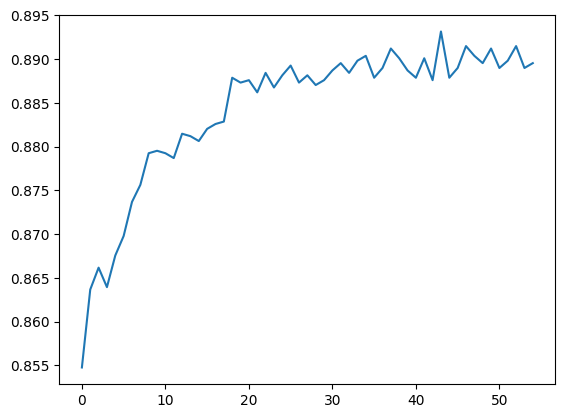

In [3]:
import pandas as pd
not_fake = pd.read_csv("C:\\Users\\ADMIN\\Documents\\True.csv")
fake = pd.read_csv("C:\\Users\\ADMIN\\Documents\\Fake.csv",low_memory=False)
X = not_fake["title"].tolist() + fake["title"].tolist()
y = [0] * len(not_fake) + [1] * len(fake)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
!pip install simple_nlp_library
from simple_nlp_library import preprocessing, embeddings
stop_words = preprocessing.stop_words()
vectors = embeddings.vectors()
X_train_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_train]
X_test_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_test]
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(25), early_stopping=True)
clf.fit(X_train_vec, y_train)
import matplotlib.pyplot as plt
plt.plot(clf.validation_scores_)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, clf.predict(X_train_vec))
accuracy_score(y_test, clf.predict(X_test_vec))
accuracy_score(y_test, clf.predict(X_test_vec))